# Analyzing Benchmark Results for Validation

In [1]:
import sys
# This allows us to import the nucml utilities
sys.path.append("..")

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_style("white")

import nucml.exfor.data_utilities as exfor_utils
import nucml.evaluation.data_utilities as endf_utils
import nucml.plot.utilities as plot_utils
import nucml.datasets as nuc_data
import nucml.ace.data_utilities as ace_utils
import nucml.model.building_utils as model_building
import nucml.model.utilities as model_utils
import nucml.general_utilities as gen_utils
import nucml.ace.plot as ace_plots

In [3]:
import importlib
importlib.reload(exfor_utils)
importlib.reload(gen_utils)
importlib.reload(endf_utils)
importlib.reload(plot_utils)
importlib.reload(nuc_data)
importlib.reload(ace_utils)
importlib.reload(model_building)
importlib.reload(model_utils)
importlib.reload(ace_plots)
print("Finish re-loading scripts.")

Finish re-loading scripts.


In [4]:
figure_dir = "figures/B0/"

In [5]:
sns.set(font_scale=2.5)
sns.set_style('white')

## Gathering Results from Benchmark Calculations

In [6]:
dt_results = ace_utils.gather_benchmark_results("ml/DT_B0/")

In [8]:
# dt_results.groupby("Model").mean()

## Analyzing Decision Tree Results

In [13]:
to_append_dt = pd.read_csv("../ML_EXFOR_neutrons/2_DT/dt_resultsB0.csv")
to_append_dt["Model"] = to_append_dt.model_path.apply(lambda x: os.path.basename(os.path.dirname(x)))
to_append_dt = to_append_dt[["Model", "train_mae", "val_mae", "test_mae", "normalizer", "max_depth", "mss", "msl"]]

In [32]:
dt_final = dt_results.merge(to_append_dt, on="Model")

In [33]:
dt_final.sort_values(by="Deviation_Ana").head()

,Model,Benchmark,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,train_mae,val_mae,test_mae,normalizer,max_depth,mss,msl
103,DT171_MSS5_MSL3_none_one_hot_B0_v1,U233-MET-FAST-001,0.999829,0.00044,1.000240,0.00029,0.000171,0.000240,0.077682,0.123198,0.123149,none,171,5,3
353,DT80_MSS2_MSL1_none_one_hot_B0_v1,U233-MET-FAST-001,1.000480,0.00043,1.000550,0.00030,0.000480,0.000550,0.026550,0.135927,0.134920,none,80,2,1
48,DT120_MSS5_MSL3_none_one_hot_B0_v1,U233-MET-FAST-001,1.000560,0.00043,1.000100,0.00029,0.000560,0.000100,0.077731,0.123492,0.122258,none,120,5,3
14,DT100_MSS5_MSL1_none_one_hot_B0_v1,U233-MET-FAST-001,0.999402,0.00044,0.998698,0.00030,0.000598,0.001302,0.052274,0.131074,0.129703,none,100,5,1
63,DT130_MSS5_MSL3_none_one_hot_B0_v1,U233-MET-FAST-001,0.999390,0.00046,0.999254,0.00031,0.000610,0.000746,0.077730,0.123489,0.122261,none,130,5,3


In [35]:
dt_standard = dt_final[dt_final.normalizer == "none"]

In [36]:
model_utils.get_best_models_df(dt_standard)

,Model,Benchmark,K_eff_ana,Unc_ana,K_eff_imp,Unc_imp,Deviation_Ana,Deviation_Imp,train_mae,val_mae,test_mae,normalizer,max_depth,mss,msl,tag
284,DT400_MSS2_MSL1_none_one_hot_B0_v1,U233-MET-FAST-001,1.001170,0.00045,1.001180,0.00030,0.001170,0.001180,0.025773,0.136140,0.135027,none,400,2,1,Train
359,DT84_MSS10_MSL7_none_one_hot_B0_v1,U233-MET-FAST-001,0.998538,0.00042,0.998018,0.00028,0.001462,0.001982,0.094411,0.119692,0.119076,none,84,10,7,Val
366,DT90_MSS10_MSL7_none_one_hot_B0_v1,U233-MET-FAST-001,0.922530,0.00045,0.922193,0.00028,0.077470,0.077807,0.094439,0.119797,0.118706,none,90,10,7,Test


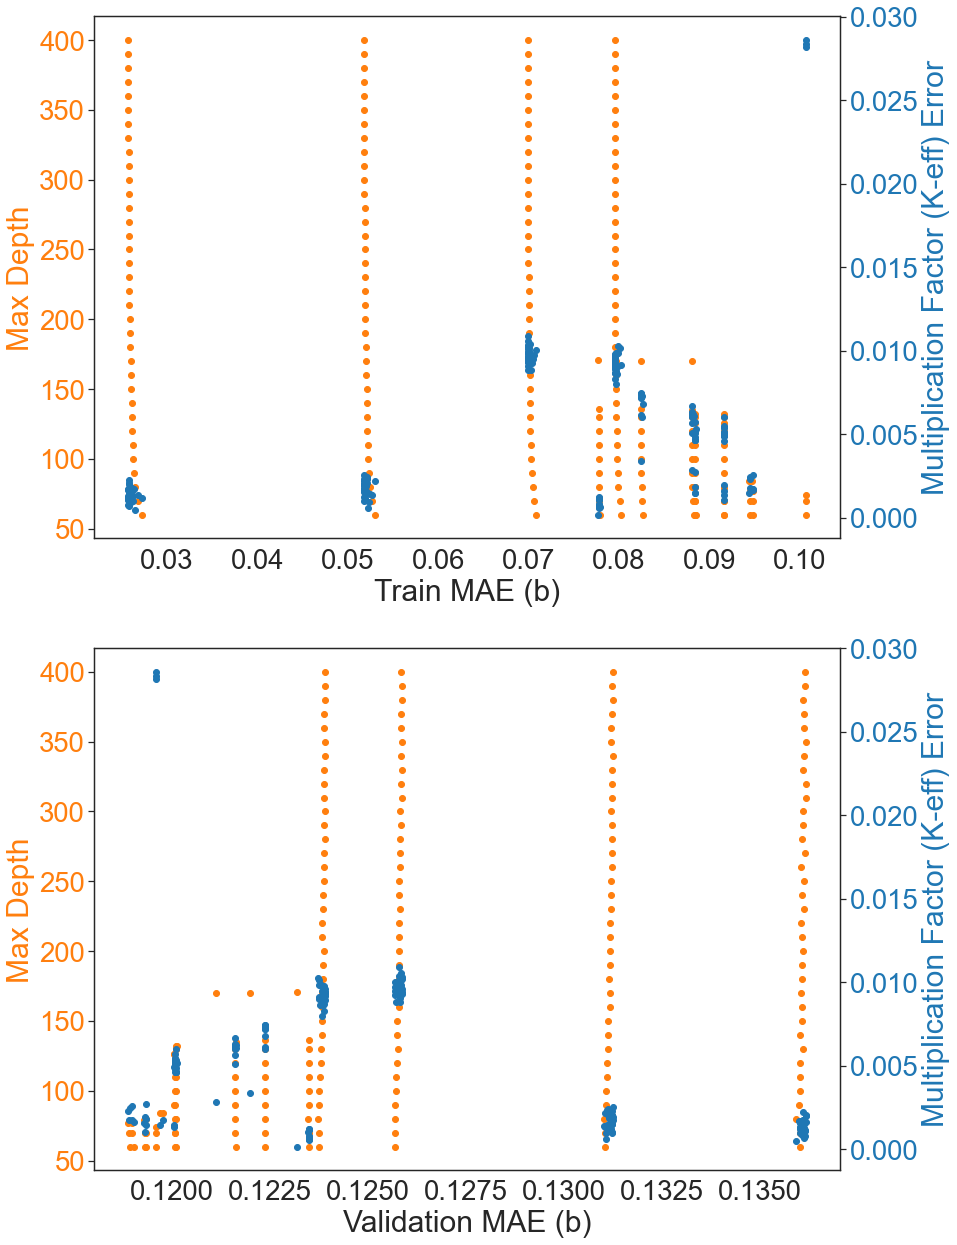

In [37]:
ace_plots.dt_dual_keff_plot(
    dt_final[dt_final.Deviation_Ana < 0.03], 
    "train_mae", "val_mae", "max_depth", "Deviation_Ana", save=False, saving_dir=figure_dir)

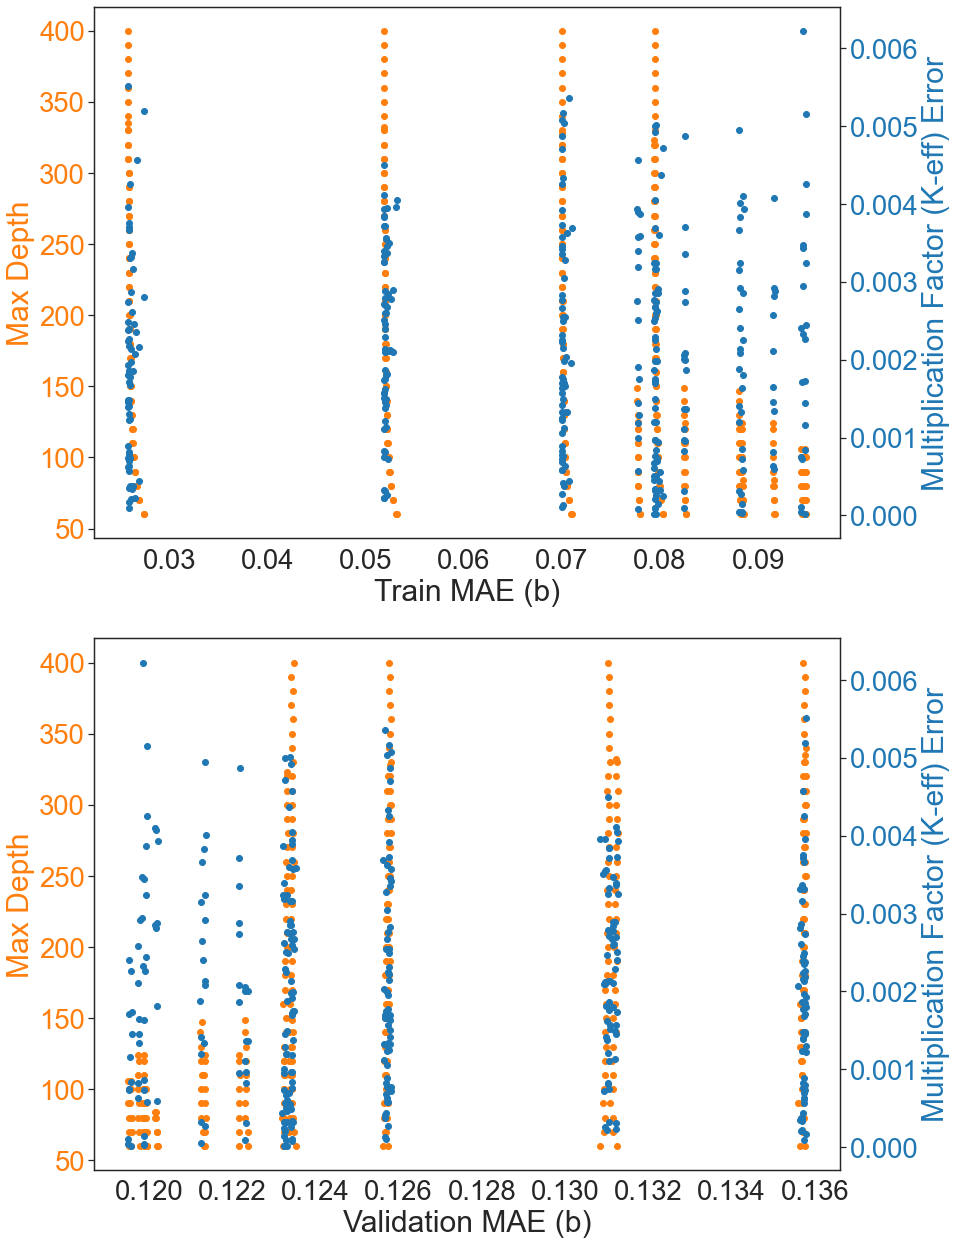

In [189]:
ace_plots.dt_dual_keff_plot(
    dt_final[dt_final.Deviation_Ana < 0.03], 
    "train_mae", "val_mae", "max_depth", "Deviation_Ana", save=True, saving_dir=figure_dir)

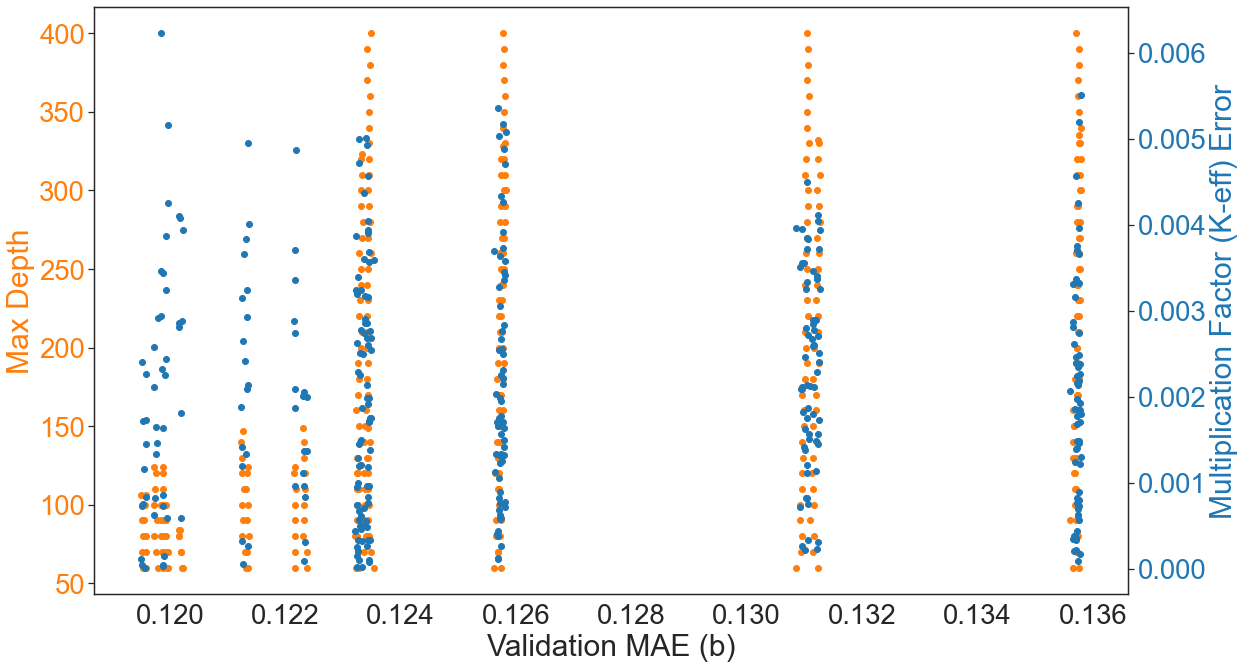

In [192]:
ace_plots.dt_keff_plot(dt_final[dt_final.Deviation_Ana < 0.03], "val_mae", "max_depth", "Deviation_Ana", save=True, saving_dir=figure_dir)